In [76]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# ARCHIVOS

sales_df = pd.read_csv('sales.csv')
product_df = pd.read_csv('product.csv')

In [120]:
# IDENTIFICAR VARIABLES CLAVE PARA EL ANÁLISIS 

# Archivo sales_df = WEEK, ITEM_CODE, TOTAL_UNIT_SALES, TOTAL_VALUE_SALES, TOTAL_UNIT_AVG_WEEKLY_SALES y REGION
# Archivo product_df = ITEM, FORMAT, ATTR1, BRAND

# Fue a través del ITEM que se pudo hacer la conexión entre tablas.

In [4]:
sales_df[['Week', 'Year']] = sales_df['WEEK'].str.split('-', expand=True)
sales_df['Week'] = sales_df['Week'].astype(int)
sales_df['Year'] = sales_df['Year'].astype(int) + 2000

In [7]:
sales_df.sample(2)

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,Week,Year
100148,41-22,7501268200513,0.001,0.011,1.000,TOTAL AUTOS AREA 2,41,2022
28100,15-22,7501071907692,1.122,28.855,3.679,TOTAL AUTOS AREA 2,15,2022


In [12]:
# Unión a un solo Dataframe
sales_product = pd.merge(sales_df, product_df, left_on='ITEM_CODE', right_on='ITEM', how='inner')

print(f"Unión completada. Se encontraron {len(sales_product)} coincidencias.")

Unión completada. Se encontraron 9193 coincidencias.


In [13]:
sales_product.sample(5)

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,Week,Year,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
5318,07-22,7501058786548BP1,0.001,0.048,1.000,TOTAL AUTOS AREA 2,7,2022,RECKITT,VANISH,7501058786548BP1,VANISH Q.MANCHAS S/CLOR BOT.ROS925ML+MMROPA WI...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA
4868,02-23,7501058794956BP1,0.002,0.118,2.000,TOTAL AUTOS AREA 4,2,2023,RECKITT,VANISH,7501058794956BP1,VANISH GEL CRYSTAL WHITE BOT 4LT + MM ROSA POU...,1,GEL,SAFE BLEACH,FABRIC TREATMENT,BLANCO
1160,49-22,7501058796578BP2,0.018,1.108,1.636,TOTAL AUTOS AREA 1,49,2022,RECKITT,VANISH,7501058796578BP2,VANISH CRYSTAL WHITE GEL BOT 900ML+MM GEL MULT...,1,GEL,SAFE BLEACH,FABRIC TREATMENT,BLANCO
8194,38-22,7501681100643BP1,0.010,0.135,5.000,TOTAL AUTOS AREA 6,38,2022,JABONERA LA ESPUMA,BANDERA,7501681100643BP1,B'CLORHADA CLORO GEL+DET BOT 1LT+MM BLANQ CONC...,1,GEL,CLORO,CLORO,MULTIUSOS
80,47-22,7501058792778BP1,0.002,0.256,2.000,TOTAL AUTOS AREA 5,47,2022,RECKITT,VANISH,7501058792778BP1,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA


In [30]:
df_SalesProduct = sales_product [['Week', 'Year', 'ITEM', 'BRAND', 'FORMAT','ATTR1',
                                  'TOTAL_UNIT_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES', 'REGION']]

df_SalesProduct.sample(10)

,Week,Year,ITEM,BRAND,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
4002,37,2022,7501025450984BP2,CLORALEX,LIQUIDO,CLORO,0.02,4.00,TOTAL AUTOS SCANNING MEXICO
6524,27,2023,7501681100643BP2,BANDERA,LIQUIDO,CLORO,0.07,18.25,TOTAL AUTOS AREA 5
4700,4,2023,7501058792778BP2,VANISH,POLVO,SAFE BLEACH,0.12,3.32,TOTAL AUTOS AREA 4
4259,27,2022,7501058794956BP2,VANISH,GEL,SAFE BLEACH,0.00,1.00,TOTAL AUTOS AREA 6
1738,4,2022,7501058792808BP2,VANISH,POLVO,SAFE BLEACH,0.07,2.50,TOTAL AUTOS AREA 3
6046,17,2023,7501058792778BP2,VANISH,POLVO,SAFE BLEACH,0.61,3.04,TOTAL AUTOS SCANNING MEXICO
4493,18,2022,7501058797865BP2,LYSOL,LIQUIDO,SANITIZANTE,0.14,2.80,TOTAL AUTOS AREA 5
607,13,2023,7501058792808BP2,VANISH,POLVO,SAFE BLEACH,0.10,2.60,TOTAL AUTOS AREA 3
5400,21,2022,7501058792778BP1,VANISH,POLVO,SAFE BLEACH,0.02,1.43,TOTAL AUTOS AREA 5
6353,21,2023,7501058792808BP1,VANISH,POLVO,SAFE BLEACH,0.14,3.78,TOTAL AUTOS AREA 4


In [32]:
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

df_SalesProduct.head(2)

,Week,Year,ITEM,BRAND,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,34,2022,7501058792808BP2,VANISH,POLVO,SAFE BLEACH,0.01,1.00,TOTAL AUTOS AREA 5
1,34,2022,7501058794963BP1,VANISH,POLVO,SAFE BLEACH,0.00,1.00,TOTAL AUTOS AREA 5


In [22]:
df_SalesProduct.tail(2)

,Week,Year,ITEM,BRAND,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
9191,26,2023,7501058792778BP1,VANISH,POLVO,SAFE BLEACH,1.192,4.000,TOTAL AUTOS SCANNING MEXICO
9192,26,2023,7702626204208BP1,VANISH,POLVO,SAFE BLEACH,21.152,22.172,TOTAL AUTOS SCANNING MEXICO


In [23]:
df_SalesProduct.shape

(9193, 9)

In [25]:
df_SalesProduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Week                         9193 non-null   int32  
 1   Year                         9193 non-null   int32  
 2   ITEM                         9193 non-null   object 
 3   BRAND                        9193 non-null   object 
 4   FORMAT                       9193 non-null   object 
 5   ATTR1                        9193 non-null   object 
 6   TOTAL_UNIT_SALES             9193 non-null   float64
 7   TOTAL_UNIT_AVG_WEEKLY_SALES  9193 non-null   float64
 8   REGION                       9193 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 574.7+ KB


In [31]:
pd.options.display.float_format = '{:.2f}'.format
df_SalesProduct.describe()

,Week,Year,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
count,9193.00,9193.00,9193.00,9193.00
mean,21.27,2022.29,0.44,4.98
std,13.65,0.45,1.46,5.09
min,1.00,2022.00,0.00,0.85
25%,10.00,2022.00,0.01,1.90
50%,20.00,2022.00,0.04,3.00
75%,30.00,2023.00,0.23,6.35
max,52.00,2023.00,22.86,74.17


In [38]:
df_SalesProduct.head(5)

,Week,Year,ITEM,BRAND,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,34,2022,7501058792808BP2,VANISH,POLVO,SAFE BLEACH,0.01,1.00,TOTAL AUTOS AREA 5
1,34,2022,7501058794963BP1,VANISH,POLVO,SAFE BLEACH,0.00,1.00,TOTAL AUTOS AREA 5
2,34,2022,7501058792778BP1,VANISH,POLVO,SAFE BLEACH,0.00,1.00,TOTAL AUTOS AREA 5
3,34,2022,7702626204208BP1,VANISH,POLVO,SAFE BLEACH,2.19,17.93,TOTAL AUTOS AREA 5
4,12,2022,7501681100650BP1,BANDERA,LIQUIDO,CLORO,0.12,7.06,TOTAL AUTOS AREA 3


C:\Users\usuario\AppData\Local\Temp\ipykernel_10168\3496970072.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


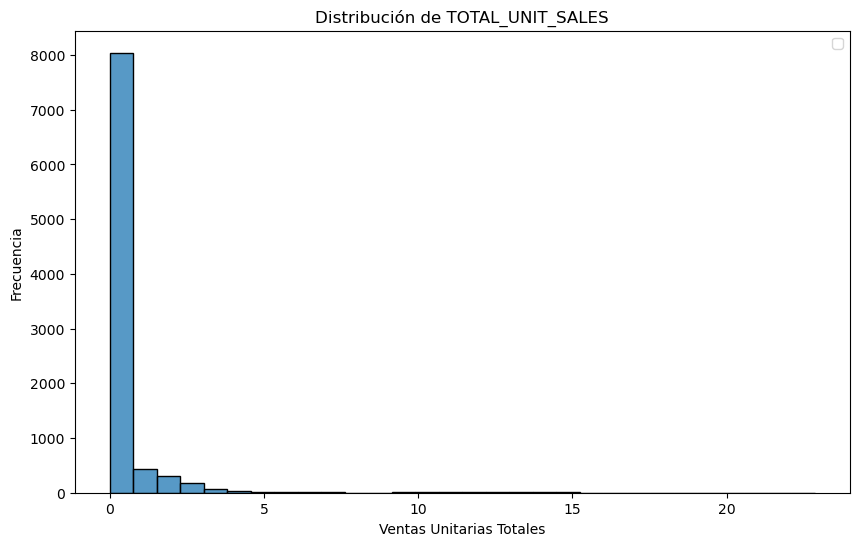

In [121]:
# VISUALIZAR LA DISTRIBUCIÓN DE VENTAS CON GRÁFICOS DE HISTOGRAMA Y BOXPLOTS

plt.figure(figsize=(10, 6))
sns.histplot(data=df_SalesProduct, x='TOTAL_UNIT_SALES', bins=30)
plt.title('Distribución de TOTAL_UNIT_SALES')
plt.xlabel('Ventas Unitarias Totales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Como es posible observar, la mayoría de los productos se venden de forma individual. 
# Pero perserveran las ventas por mayor unidad, más adelante se hará una observación más cercana. 

C:\Users\usuario\AppData\Local\Temp\ipykernel_10168\44669018.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_SalesProduct, x='BRAND', y='TOTAL_UNIT_SALES', estimator=sum, ci=None,


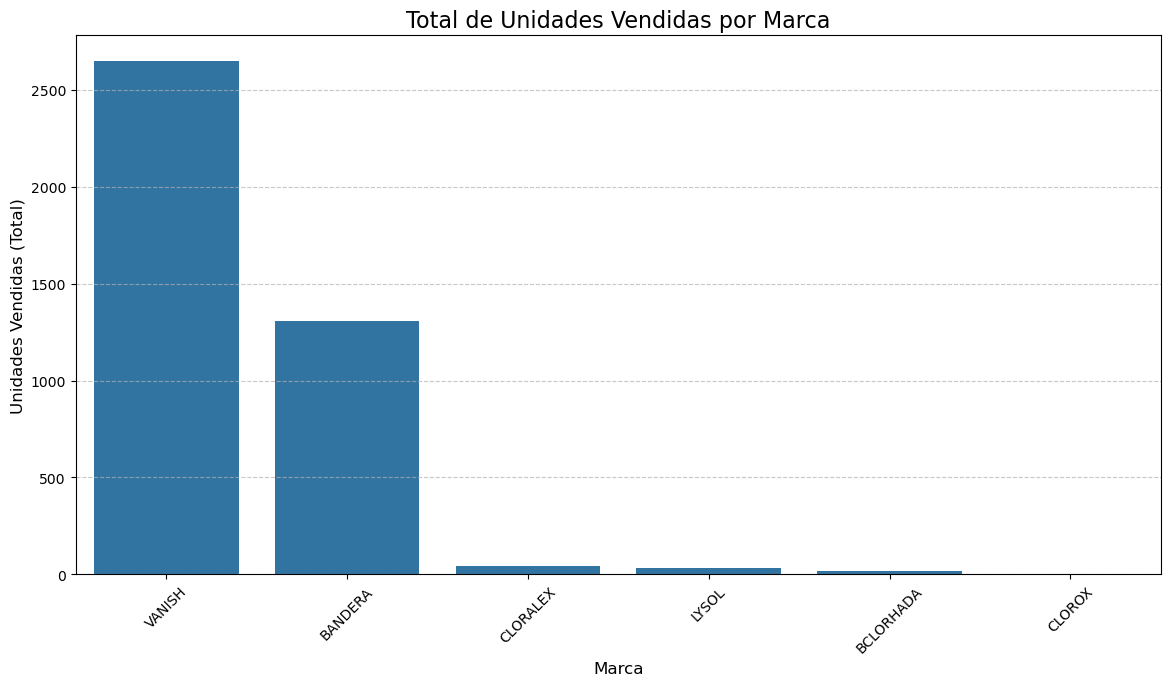

In [57]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df_SalesProduct, x='BRAND', y='TOTAL_UNIT_SALES', estimator=sum, ci=None,
            order=df_SalesProduct.groupby('BRAND')['TOTAL_UNIT_SALES'].sum().sort_values(ascending=False).index)
plt.title('Total de Unidades Vendidas por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Unidades Vendidas (Total)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Vanish se especializa en generar productos para lavado de ropa, 
# prometiendo eliminar bacterias, manchas y darle mayor vida a las prendas.
# Vanish se ha dedicado a elaborar distintos formatos (liquido, polvo y gel) para adaptarse a las distintas necesidades y preferencias.

<Axes: xlabel='FORMAT', ylabel='TOTAL_UNIT_SALES'>

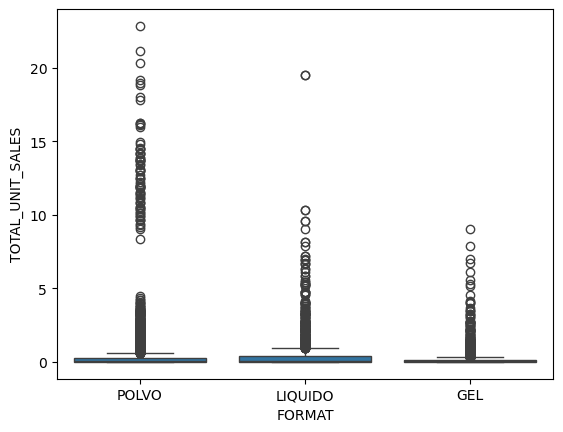

In [124]:
sns.boxplot(data=df_SalesProduct, x='FORMAT', y='TOTAL_UNIT_SALES')
# Aunque la mayoría de las ventas son por unidad, la gráfica refleja que existen usuarios que hacen compras por mayoreo. 
# El polvo es el fromato más vendido por mayoreo.

In [71]:
# ANALIZAR LA TENDENCIA DE VENTAS EN EL TIEMPO

df_SalesProduct['Fecha'] = pd.to_datetime(df_SalesProduct['Year'].astype(str) + '-W' + df_SalesProduct['Week'].astype(str) + '-1', format='%Y-W%W-%w')
df_SalesProduct.sample(4)

C:\Users\usuario\AppData\Local\Temp\ipykernel_10168\64311431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SalesProduct['Fecha'] = pd.to_datetime(df_SalesProduct['Year'].astype(str) + '-W' + df_SalesProduct['Week'].astype(str) + '-1', format='%Y-W%W-%w')


,Week,Year,ITEM,BRAND,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,Fecha
7406,8,2022,7501058794970BP2,VANISH,POLVO,SAFE BLEACH,0.01,1.75,TOTAL AUTOS SCANNING MEXICO,2022-02-21
4446,1,2022,7501058794949BP1,VANISH,GEL,SAFE BLEACH,0.25,7.49,TOTAL AUTOS AREA 3,2022-01-03
3291,3,2022,7501681100643BP1,BANDERA,GEL,CLORO,0.82,20.07,TOTAL AUTOS AREA 5,2022-01-17
88,13,2022,7501058794963BP2,VANISH,POLVO,SAFE BLEACH,0.01,2.25,TOTAL AUTOS AREA 5,2022-03-28


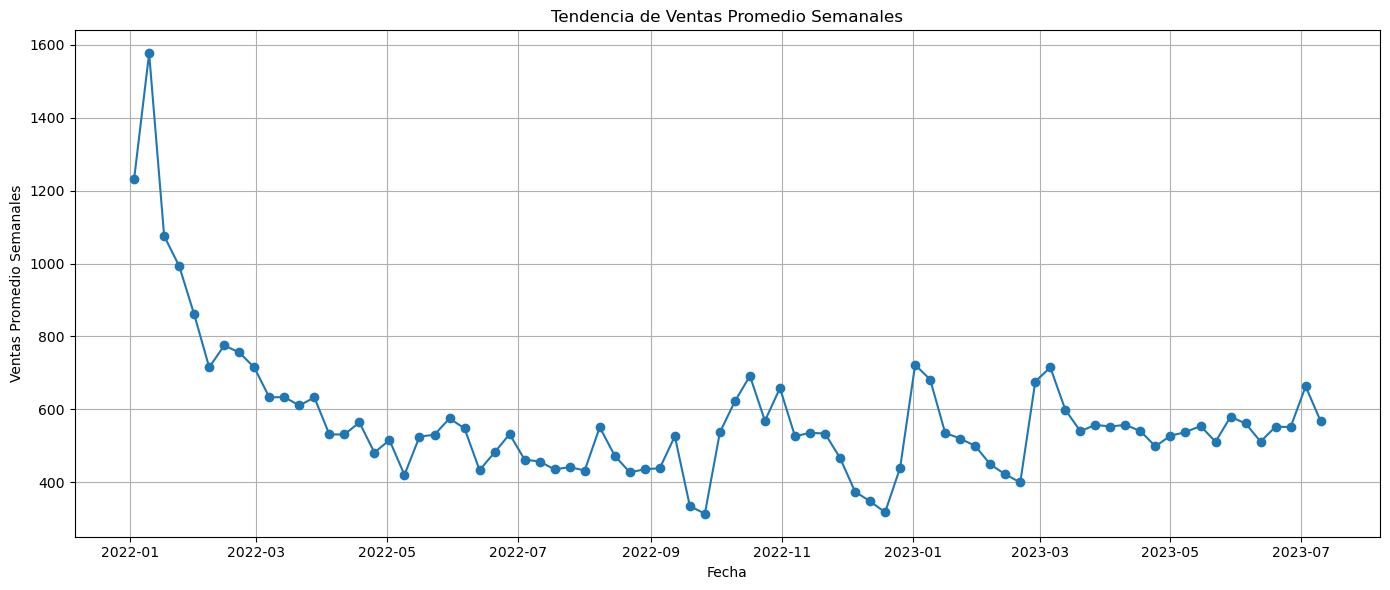

In [126]:
ventas_semanales = df_SalesProduct.groupby('Fecha')['TOTAL_UNIT_AVG_WEEKLY_SALES'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(ventas_semanales['Fecha'], ventas_semanales['TOTAL_UNIT_AVG_WEEKLY_SALES'], marker='o')
plt.title('Tendencia de Ventas Promedio Semanales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Promedio Semanales')
plt.grid(True)
plt.tight_layout()
plt.show()

# A inicios del 2022 la ventas eran muy altas, llegando a vender más de 1500 unidades. 
# Luego se observa una disminución pronunciada que mantuvo la venta de 400 a 700 unidades por el resto del año 2022.

# Existen ventas de repunte, esto se puede deber a eventos estacionales. 
# Aunque las ventas de 2023 se han mantenido más estables, no ha sido posible alcanzar las ventas que hubo a inicios del año 2022. 

# Sería adecuado comprender que evento promovió la venta masiva a inicios del año 2022. 

In [81]:
ventas_marca = df_SalesProduct.groupby(['Year', 'Week', 'BRAND'])['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_marca['Fecha'] = pd.to_datetime(ventas_marca['Year'].astype(str) + "-W" + ventas_marca['Week'].astype(str) + "-1", format="%Y-W%W-%w")

ventas_marca.sample(2)

,Year,Week,BRAND,TOTAL_UNIT_SALES,Fecha
285,2023,28,CLOROX,0.02,2023-07-10
96,2022,27,BANDERA,1.31,2022-07-04


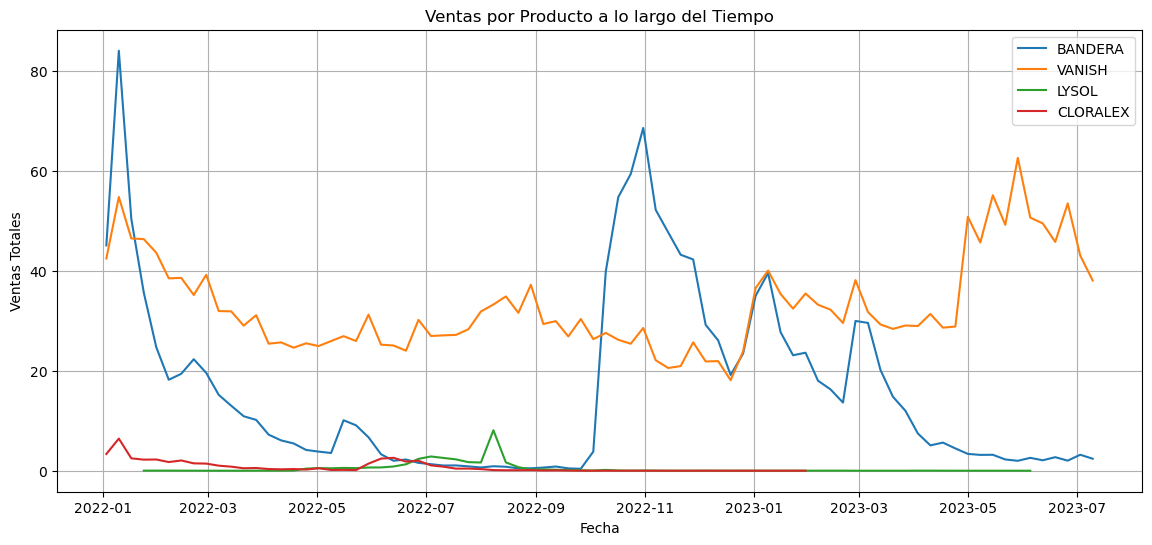

In [127]:
plt.figure(figsize=(14,6))
for marca in top_marcas:
    df_marca = ventas_marca_filtrada[ventas_marca_filtrada['BRAND'] == marca]
    plt.plot(df_marca['Fecha'], df_marca['TOTAL_UNIT_SALES'], label=marca)

plt.title('Ventas por Producto a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.show()

# Bandera ha sido una marca con ventas altamente pronunciadas,
# pero también puede estar muchos meses con ventas muy bajas (similares a las marcas que se mantienen sin crecimiento a lo largo del tiempo).

# Vanish manitiene ventas constantes. 
# A finales del año 2023 generó ventas mayores y continuas. 

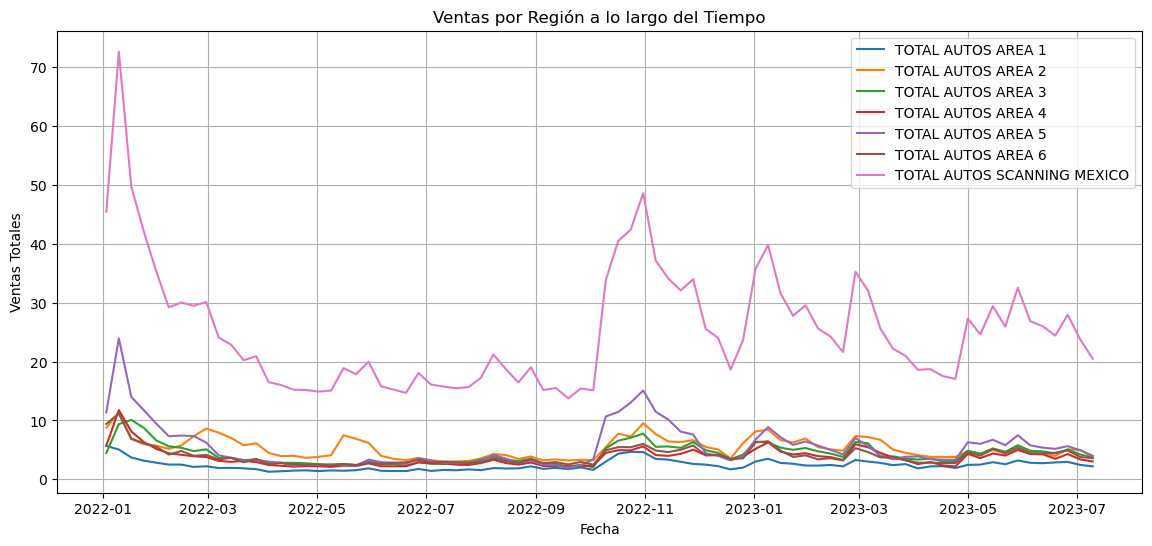

In [128]:
ventas_region = df_SalesProduct.groupby(['Year', 'Week', 'REGION'])['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_region['Fecha'] = pd.to_datetime(ventas_region['Year'].astype(str) + "-W" + ventas_region['Week'].astype(str) + "-1", format="%Y-W%W-%w")

plt.figure(figsize=(14,6))
for region in top_regiones:
    df_region = ventas_region_filtrada[ventas_region_filtrada['REGION'] == region]
    plt.plot(df_region['Fecha'], df_region['TOTAL_UNIT_SALES'], label=region)

plt.title('Ventas por Región a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.show()

# Todas la regiones (menos SCANNING MEXICO) generan compras contantes a lo largo de los años.

# Las adquisiciones de SCANNING MEXICO son mayores que el resto de las regiones, pero son ventas muy inconsistentes. 

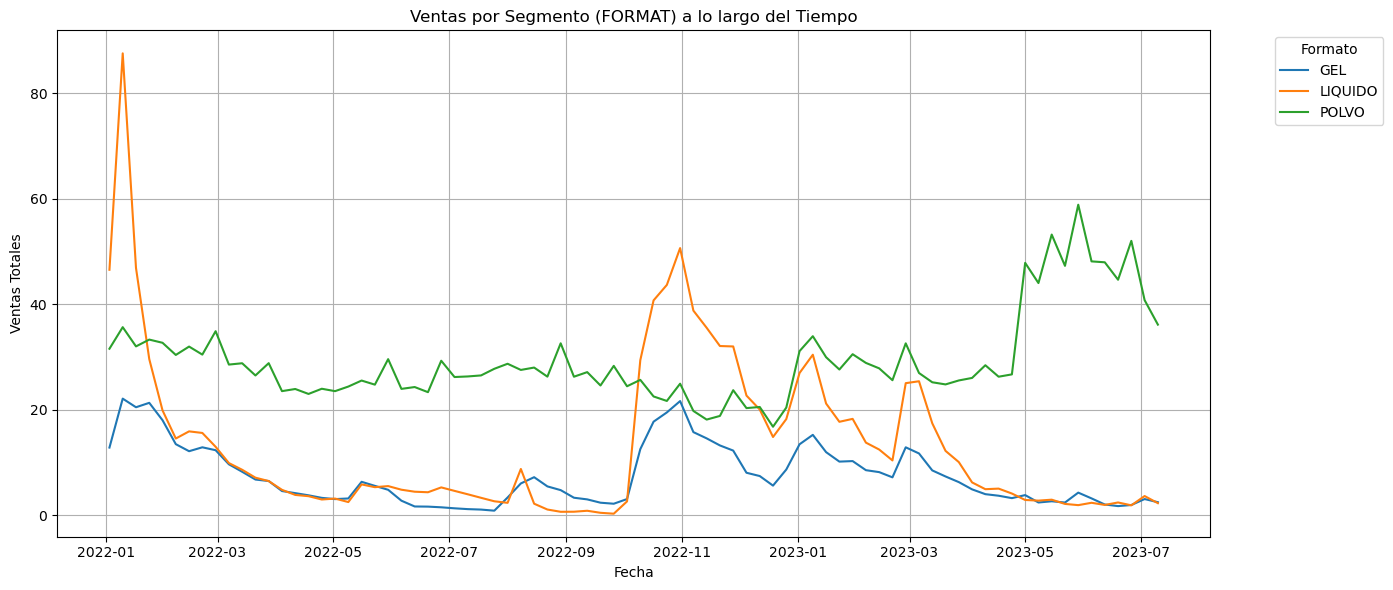

In [129]:
ventas_formato = df_SalesProduct.groupby(['Year', 'Week', 'FORMAT'])['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_formato['Fecha'] = pd.to_datetime(ventas_formato['Year'].astype(str) + "-W" + ventas_formato['Week'].astype(str) + "-1", format="%Y-W%W-%w")

plt.figure(figsize=(14, 6))
for formato in ventas_formato['FORMAT'].unique():
    df_f = ventas_formato[ventas_formato['FORMAT'] == formato]
    plt.plot(df_f['Fecha'], df_f['TOTAL_UNIT_SALES'], label=formato)

plt.title('Ventas por Segmento (FORMAT) a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Formato', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.grid(True)
plt.show()

# El formato liquido se represanta como el formato más vendido, pero su adquisicón va hacia los extremos, es decir, o su venta es muy alta o muy baja. 

# La venta de polvo es contante a lo largo del año. 
# Y a mediados del año 2023 tuvo un crecimeinto sano, es decir, sus ventas fueron mayores y se ha mantenido del mismo modo.

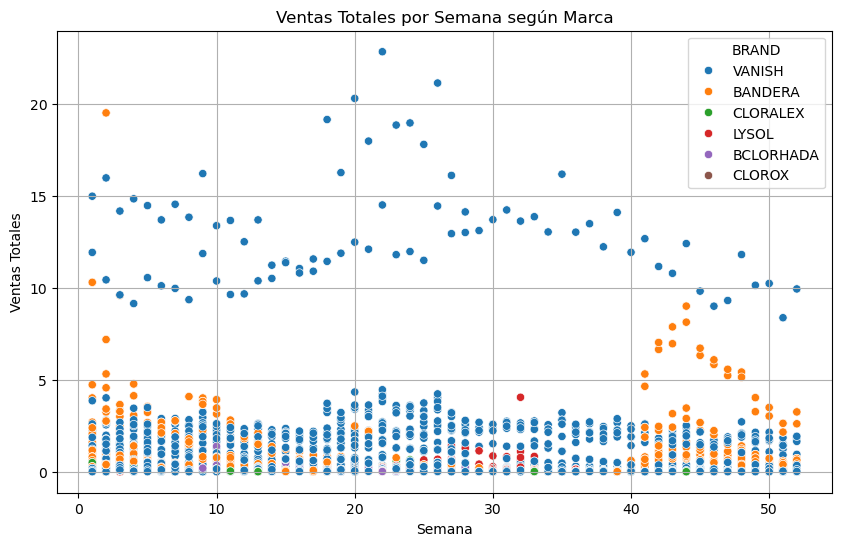

In [103]:
#EXPLORAR RELACIÓN ENTRE DISTINTAS VARIABLES

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_SalesProduct, x='Week', y='TOTAL_UNIT_SALES', hue='BRAND')
plt.title('Ventas Totales por Semana según Marca')
plt.xlabel('Semana')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

# Vanish refleja ser una marca que tiene alcance en venta por unidad (personas que adquieren para uso personal), 
# pero también es un producto preferido para comprar por mayoreo (para empresas)

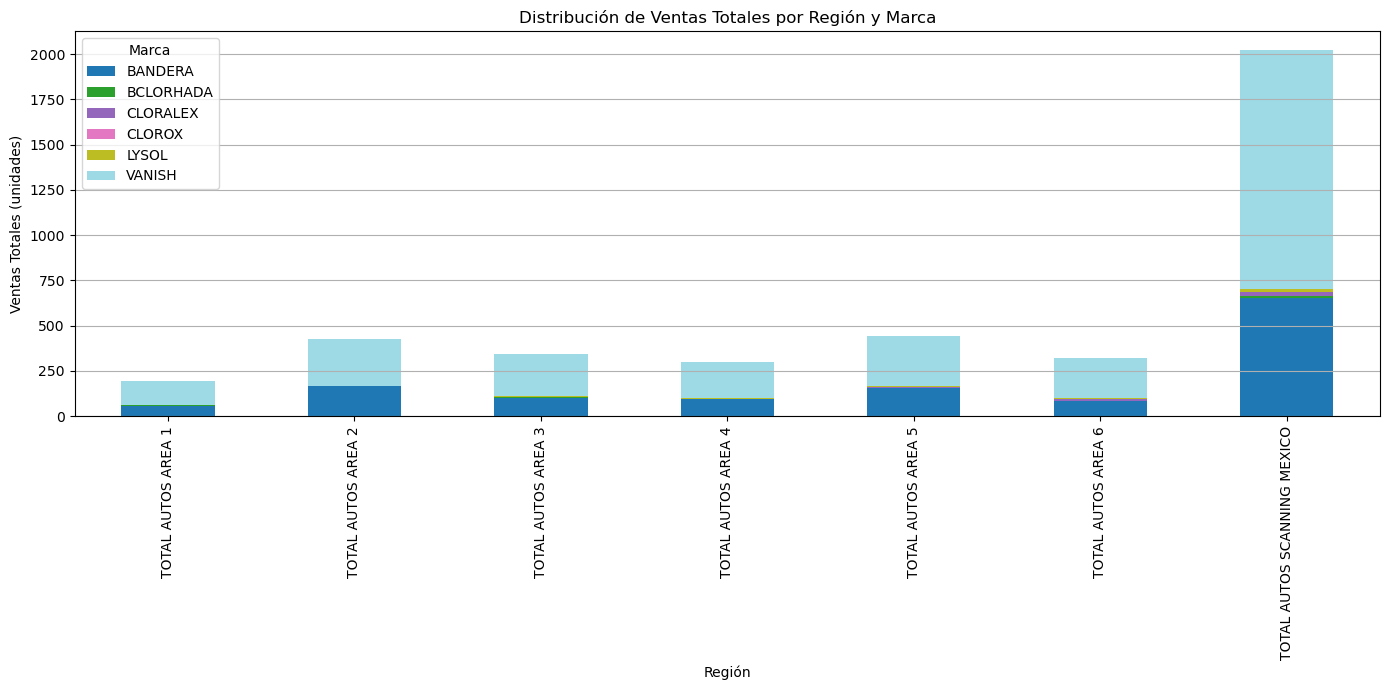

In [109]:
# VISUALIZACIÓN DE DISTRIBUCIÓN GEOGRÁFICA DE LAS VENTAS

ventas_region_marca = df_SalesProduct.groupby(['REGION', 'BRAND'])['TOTAL_UNIT_SALES'].sum().unstack().fillna(0)

ventas_region_marca.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Distribución de Ventas Totales por Región y Marca')
plt.ylabel('Ventas Totales (unidades)')
plt.xlabel('Región')
plt.legend(title='Marca', loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Vanish es altamente adquierido por la región SCANNING MÉXICO. ¿Qué uso le da el cliente? ¿Qué otro producto se le puede oferecer?
# Todas las regiones tiene preferencia por las marcas Vanish y Bandera. 

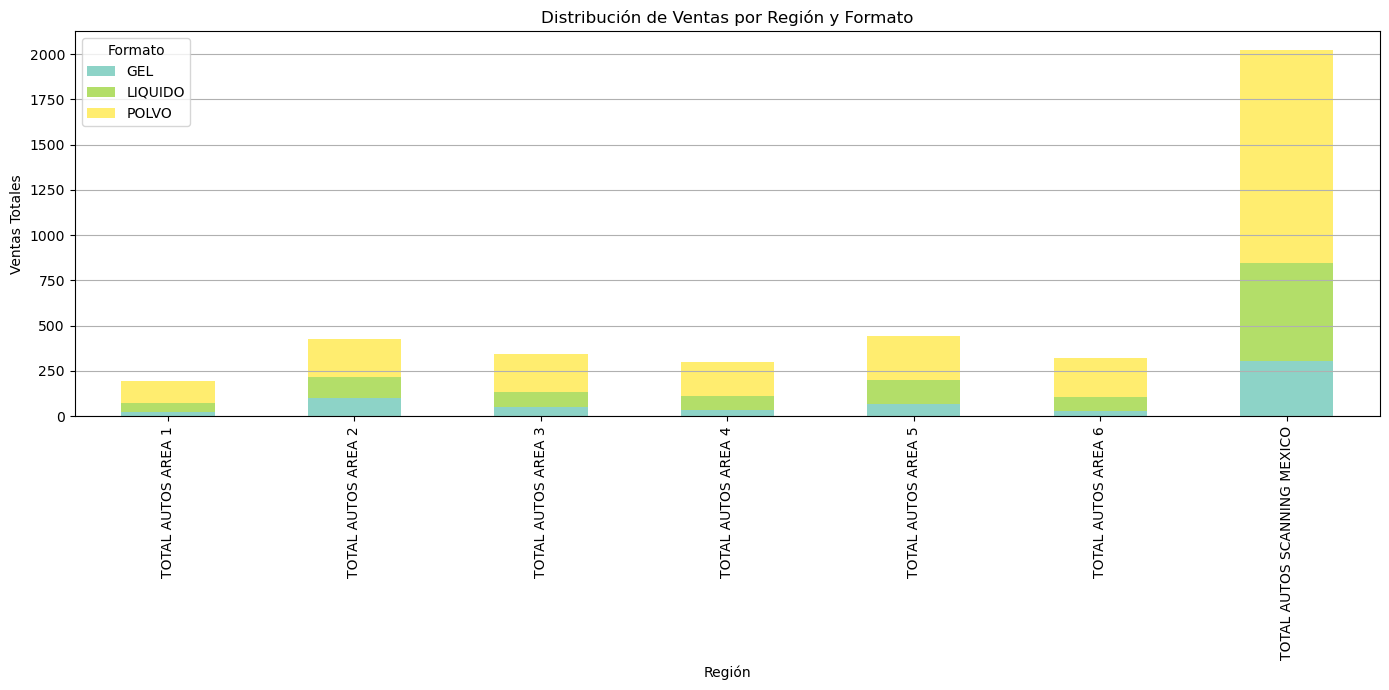

In [111]:
ventas_region_formato = df_SalesProduct.groupby(['REGION', 'FORMAT'])['TOTAL_UNIT_SALES'].sum().unstack().fillna(0)

ventas_region_formato.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')
plt.title('Distribución de Ventas por Región y Formato')
plt.ylabel('Ventas Totales')
plt.xlabel('Región')
plt.legend(title='Formato', loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Todas las regiones tienen preferecnia por el formato polvo ¿cuál será el motivo? 
# ¿es más económico o su formula da mejor resultados? ¿su duración es mayor?
# Aunque el gel es el formato menos vendido, sí genera ventas. 

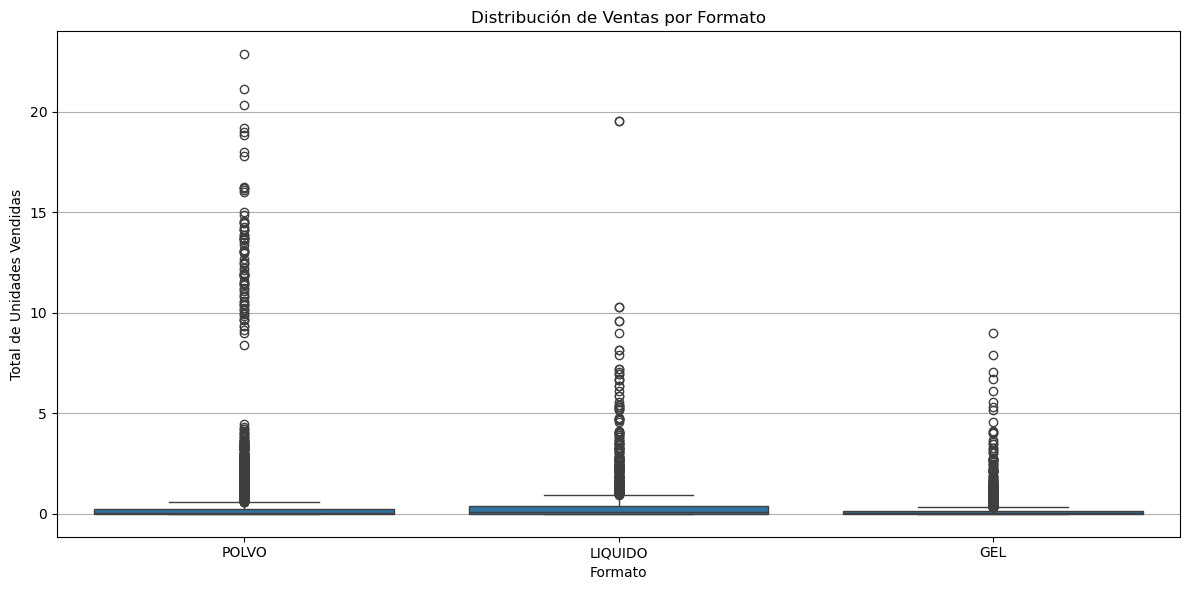

In [130]:
# IDENTIFICAR OUTLIERS Y ANOMALÍAS

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_SalesProduct, x='FORMAT', y='TOTAL_UNIT_SALES')
plt.title('Distribución de Ventas por Formato')
plt.xlabel('Formato')
plt.ylabel('Total de Unidades Vendidas')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# El promedio de ventas por formato son unidades indiviuales (menos de 3). Sin embargo, existen muchos clientes que hacen compras por mayoreo.

# Las tres cajas reflejan la existencia de clientes que compran por mayore, que hay ventas muy inconsistentes o hubieron campañas exitosas.
# Pero algo que sí se puede asegurar es que: las ventas no son estables y predecibles. 